<a href="https://colab.research.google.com/github/NikethML/customerSegmentation/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


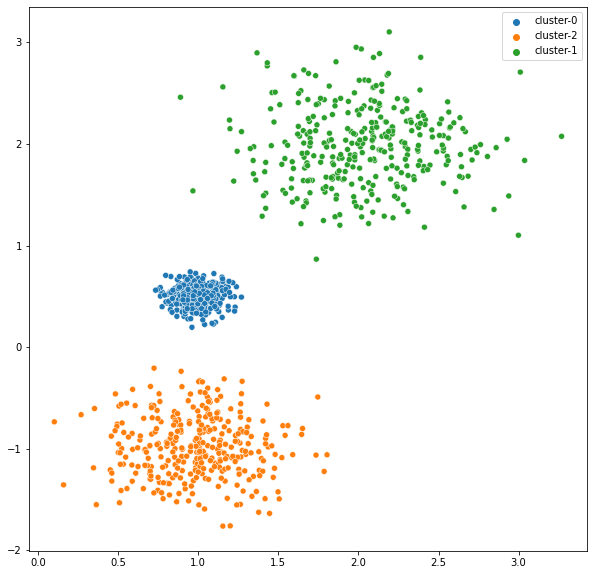

In [1]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

In [3]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

KMeans(n_clusters=3)

In [4]:
Kmean.cluster_centers_


array([[ 2.03327413,  1.9895853 ],
       [ 0.98830682, -0.98978161],
       [ 0.99319695,  0.49866737]])

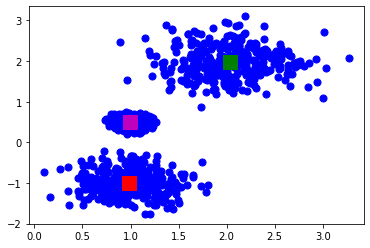

In [12]:
plt.scatter(X[:,0], X[:,1], s =50, c='b')
plt.scatter(2.03327413, 1.9895853 , s=200, c='g', marker='s')
plt.scatter(0.98830682, -0.98978161, s=200, c='r', marker='s')
plt.scatter(0.99319695, 0.49866737, s=200, c='m', marker='s')

plt.show()

In [14]:
labels=Kmean.labels_

In [16]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))


Homogeneity: 0.973


In [49]:
url='https://raw.githubusercontent.com/NikethML/customerSegmentation/main/Copy%20of%20Cust_Segmentation.csv'
df=pd.read_csv(url)

In [50]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [51]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [52]:
df.drop(columns=['Customer Id','Address'],inplace=True)

In [68]:
df.head(850)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [67]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [71]:
df.dropna(inplace=True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_s = pd.DataFrame(sc.fit_transform(df))
df_s.shape


(700, 8)

In [73]:
df_s.head()

,0,1,2,3,4,5,6,7
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


In [74]:
df_s.shape

(700, 8)

In [75]:
df.shape

(700, 8)

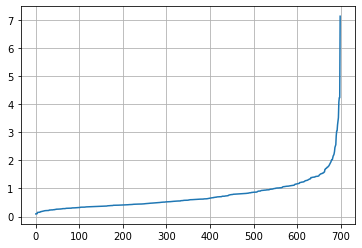

In [109]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_s)
distances, indices = nbrs.kneighbors(df_s)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)

In [ ]:
#max curvature at 1.5 hence value of epsilon is 1.5

In [110]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=1.5, min_samples=10)

model_dbs = dbs.fit(df_s)
df['DBS_label'] = model_dbs.fit_predict(df_s)

In [111]:
df.head(70)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,DBS_label
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,-1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,-1
...,...,...,...,...,...,...,...,...,...
84,49,2,11,51,0.543,7.107,0.0,15.0,0
88,28,2,8,31,1.492,1.050,1.0,8.2,1
89,23,4,0,32,0.818,5.070,1.0,18.4,-1
90,37,2,11,75,0.633,1.992,0.0,3.5,0


In [112]:
df['DBS_label'].value_counts()


 0    475
 1    130
-1     95
Name: DBS_label, dtype: int64

In [113]:
df.groupby('DBS_label').mean()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
DBS_label,,,,,,,,
-1,42.378947,2.273684,13.378947,93.263158,4.572863,8.292779,0.557895,16.732632
0,34.757895,1.604211,8.821053,41.061053,1.045691,2.240331,0.000000,8.277895
1,29.738462,1.753846,3.161538,27.361538,1.202854,2.221277,1.000000,12.775385


In [80]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt